

---



In [ ]:
# Instalando netCDF
!pip install netCDF4

# Instalando Pygrib
!pip install pygrib

# instalando MetPy
!pip install MetPy

# Instalando Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force

# Corrigiendo matplotlib
!pip uninstall matplotlib -y
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.5 MB 309 kB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 367 kB 5.0 MB/s 
     |████████████████████████████████| 11.2 MB 15.5 MB/s 
     |████████████████████████████████| 209 kB 59.8 MB/s 
     |████████████████████████████████| 944 kB 56.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentatio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 2.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 33.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 6.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 13.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 29.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.9 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-

Link de referencia

https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20220622/00/atmos/gfs.t00z.pgrb2b.1p00.f000
https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20220622/00/atmos/gfs.t00z.pgrb2b.1p00.f006
https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20220622/00/atmos/gfs.t00z.pgrb2b.1p00.f012

In [ ]:
import os
import sys
import urllib.request
from datetime import datetime

def get_gfs(run=0, resolution=0.5, frcst=0, date=None, path='./'):
    resolution = f'{resolution:.2f}'.replace('.','p')
    
    os.makedirs(path, exist_ok=True)
    if not path[-1]=='/':
        path += '/'

    if not date:
        date = datetime.today().strftime('%Y%m%d')
    
    url = f'https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.{date}/{run:02d}/atmos/'
    filename = f'gfs.t{run:02d}z.pgrb2b.{resolution}.f{frcst:03d}'

    if not os.path.isfile(path+filename):
        print(f'[-] {filename}', flush=True, end='\r')
        urllib.request.urlretrieve(url+filename, path+filename)
        print(f'\r[+] {filename}')
    else:
        print(f'\r[*] {filename} -> Existe')
    return path+filename

In [ ]:
import os
import sys
import urllib.request
from datetime import datetime

def get_gfs(run=0, resolution=0.5, frcst=0, date=None, path='./'):
    resolution = f'{resolution:.2f}'.replace('.','p')
    
    os.makedirs(path, exist_ok=True)
    if not path[-1]=='/':
        path += '/'

    if not date:
        date = datetime.today().strftime('%Y%m%d')
    
    url = f'https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.{date}/{run:02d}/atmos/'
    filename = f'gfs.t{run:02d}z.pgrb2.{resolution}.f{frcst:03d}'

    if not os.path.isfile(path+filename): # esto es para ver si ya exste el fichero
        print(f'[-] {filename}', flush=True, end='\r')
        urllib.request.urlretrieve(url+filename, path+filename)
        print(f'\r[+] {filename}')
    else:
        print(f'\r[*] {filename} -> Existe')
    return path+filename # si no especificamos el elemento de devolvida entonces no tenemos nada
    #te devuelve la ruta completa

In [ ]:
for i in range(0,40,6):
    get_gfs(path='Data/', frcst=i)

[+] gfs.t00z.pgrb2.0p50.f000
[+] gfs.t00z.pgrb2.0p50.f006
[+] gfs.t00z.pgrb2.0p50.f012
[+] gfs.t00z.pgrb2.0p50.f018
[+] gfs.t00z.pgrb2.0p50.f024
[+] gfs.t00z.pgrb2.0p50.f030
[+] gfs.t00z.pgrb2.0p50.f036


In [ ]:

!ls -lh Data

total 1.7G
drwxr-xr-x 3 root root 4.0K Jul 18 23:43 12
-rw-r--r-- 1 root root 145M Jul 18 23:43 gfs.t00z.pgrb2.0p50.f000
-rw-r--r-- 1 root root 154M Jul 18 23:43 gfs.t00z.pgrb2.0p50.f006
-rw-r--r-- 1 root root 154M Jul 18 23:43 gfs.t00z.pgrb2.0p50.f012
-rw-r--r-- 1 root root 155M Jul 18 23:43 gfs.t00z.pgrb2.0p50.f018
-rw-r--r-- 1 root root 154M Jul 18 23:43 gfs.t00z.pgrb2.0p50.f024
-rw-r--r-- 1 root root 154M Jul 18 23:43 gfs.t00z.pgrb2.0p50.f030
-rw-r--r-- 1 root root 154M Jul 18 23:44 gfs.t00z.pgrb2.0p50.f036
-rw-r--r-- 1 root root  68M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f000
-rw-r--r-- 1 root root  69M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f006
-rw-r--r-- 1 root root  68M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f012
-rw-r--r-- 1 root root  69M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f018
-rw-r--r-- 1 root root  69M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f024
-rw-r--r-- 1 root root  68M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f030
-rw-r--r-- 1 root root  67M Jul 18 23:40 gfs.t00z.pgrb2b.0p50.f036
-rw-r--r-- 1 r



---



In [ ]:

import pygrib
import numpy as np
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
import os
import xarray as xr
from itertools import chain
import numpy as np
import pygrib
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
import numpy as np
from metpy.calc import lat_lon_grid_deltas, advection
#metodo constructor
class GFS:
    def __init__(self, date=None, run=0, frcst=0, resolution=0.5):
        # datetime corrida 0 resolución 0.5 por defecto
        # metodo constructuor
        #z fill cuantos digitos se va haber
        self.date = date if date else datetime.strftime('%Y%m%d')
        self.run = str(run).zfill(2) #creación del objeto
        self.frcst = str(frcst).zfill(3)
        self.resolution = resolution
        self.extent = [-85, -20, -60, 2]#area que nos interesa graficar 
        self.dataPath = './' #ruta donde colocar los datos datapath por defecto

    def download_data(self):#llama al objeto que se ha creado 
        self.file = get_gfs(run=int(self.run), resolution=self.resolution, frcst=int(self.frcst),
                            date=self.date, path=self.dataPath)
    
    def read(self):  # el file es un atributo 
        self.grib = pygrib.open(self.file)

    def query(self):#definir si existe un objeto 
        if hasattr(self, 'grib'): #para verificar si existe el grib o objeto
        # verificando si hay datos abiertos
            if not hasattr(self, 'variables'): 
                self.variables = set([str(var).split(':')[1] for var in self.grib])
            print(f'\nVariables:','-'*20,sep='\n')
            for i,var in enumerate(self.variables):
                print(f'[{i:>3} ] -> {var}')
        else: # si no existe el query entonces  self.file -> es un atributo
            print('Leyendo datos')
            if not hasattr(self, 'file'):
                self.download_data()
            self.read()
            self.query()
    
    def select(self, varname, level=None):
        if level:
            variable = self.grib.select(name=varname, typeOfLevel='isobaricInhPa', level=level)[0]
        else:
            variable = self.grib.select(name=varname)[0]
        
        self.info = {'analDate': f'{variable.analDate:[%HZ %Y-%m-%d]}',
                     'validDate': f'{variable.validDate:[%HZ %Y-%m-%d]}'}
        
        variable, self.lats, self.lons = variable.data(lat1=self.extent[1], lat2=self.extent[3],
                                                       lon1=self.extent[0]+360, lon2=self.extent[2]+360)
        return variable
    
    def figure(self, **kwargs): #para despues definir la entrada con cualquier cosa de **kwargs
        plt.figure(figsize=(10,10))
        mapProjection = kwargs['proj'] if 'proj' in kwargs else ccrs.PlateCarree()
        self.__ax = plt.axes(projection=mapProjection)

        self.__ax.coastlines(resolution='10m', color='k', linewidth=0.8)
        self.__ax.add_feature(cartopy.feature.BORDERS, edgecolor='k', linewidth=0.5)
        gl = self.__ax.gridlines(crs=ccrs.PlateCarree(), color='gray', linestyle='--',
                        linewidth=0.25, xlocs=np.arange(-180,180,5),
                        ylocs=np.arange(-90,90,5), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False

        img_extent = [self.extent[0], self.extent[2],
                      self.extent[1], self.extent[3]]

        self.__ax.set_extent(img_extent, mapProjection)

    def shaded(self, variable, cmap='GnBu'): #color map en matplotlib y que esta por defecto o el color map
        img = self.__ax.contourf(self.lons, self.lats, variable, cmap=cmap, extend='both')
        cbar = plt.colorbar(img, orientation='horizontal', fraction=0.05, pad=0.05)
    
    def contour(self, variable, color='#000000', linewidth=0.5, label=True): #para añadir un contorno #0000 es un black o negro
        img = self.__ax.contour(self.lons, self.lats, variable, colors=color, linewidth=linewidth)
        if label:
            self.__ax.clabel(img, inline=1, fontsize=8, colors='#000000', use_clabeltext=True) #se dan los parametros que iran por defectos y ya notengas que estar haciendo otra ves

    def barb(self, var1, var2, skip=1, color='k', alpha=1): #para definir las barbas
        flip_flag = np.zeros((var1.shape[0], var2.shape[1]))

        flip_flag[self.lats<0] = 1 #para los vectores que estan por debajo del ecuador
        self.__ax.barbs(self.lons[::skip,::skip], self.lats[::skip,::skip],
                        var1[::skip,::skip], var2[::skip,::skip],
                        length=5, sizes=dict(emptybarb=0.0, spacing=0.2, height=0.3),
                        linewidth=0.8, pivot='middle', barbcolor=color, alpha=alpha,
                        flip_barb=flip_flag[::skip,::skip])

    def savefig(self, filename):
        plt.savefig(f'{filename}.png', pad_inches=0, format='png')
        plt.clf()
        plt.close('all') #para asegurarnos que el lienzo este limpio

##a) Realizar la descarga del GFS del día 09 de julio del 2022 de las 12Z, datos de atmósfera, a 
una resolución de 0.5, forecast de 00 (09/07/2022 12z)

In [ ]:

gfs = GFS(resolution=0.5,frcst=0,run=12,date="20220709") #reconoce la resolución especifica para 1 grado
gfs.dataPath = f'Data/{gfs.run}/{gfs.date}/' # ruta donde se guardan archivos
gfs.download_data()  # gfs es el objeto que hemos creado
gfs.read()
gfs.query()

[*] gfs.t12z.pgrb2.0p50.f000 -> Existe

Variables:
--------------------
[  0 ] -> Ozone mixing ratio
[  1 ] -> 2 metre temperature
[  2 ] -> Rain mixing ratio
[  3 ] -> Wind speed (gust)
[  4 ] -> Pressure of level from which parcel was lifted
[  5 ] -> Soil Temperature
[  6 ] -> Medium cloud cover
[  7 ] -> V component of wind
[  8 ] -> Ice water mixing ratio
[  9 ] -> Sea ice area fraction
[ 10 ] -> Pressure
[ 11 ] -> Apparent temperature
[ 12 ] -> Water equivalent of accumulated snow depth (deprecated)
[ 13 ] -> Orography
[ 14 ] -> Tropopause pressure
[ 15 ] -> Total Cloud Cover
[ 16 ] -> Visibility
[ 17 ] -> 2 metre relative humidity
[ 18 ] -> Ventilation Rate
[ 19 ] -> Geometric vertical velocity
[ 20 ] -> Categorical freezing rain
[ 21 ] -> Planetary boundary layer height
[ 22 ] -> Snow mixing ratio
[ 23 ] -> MSLP (Eta model reduction)
[ 24 ] -> Geopotential Height
[ 25 ] -> Categorical ice pellets
[ 26 ] -> Precipitable water
[ 27 ] -> Temperature
[ 28 ] -> 10 metre V wind compo

In [ ]:
# !mkdir Data
# !curl https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20220709/12/atmos/gfs.t12z.pgrb2.0p50.f000 -O gfs.t12z.pgrb2.0p50.f000 
# !mv gfs.t12z.pgrb2.0p50.f000  ./Data

mkdir: cannot create directory ‘Data’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  144M  100  144M    0     0  34.5M      0  0:00:04  0:00:04 --:--:-- 34.5M
curl: (6) Could not resolve host: gfs.t12z.pgrb2.0p50.f000


In [ ]:
import urllib.request
import os
url = "https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20220709/12/atmos/gfs.t12z.pgrb2.0p50.f000"
grib_file = os.path.basename(url)
urllib.request.urlretrieve(url, grib_file)

('gfs.t12z.pgrb2.0p50.f000', <http.client.HTTPMessage at 0x7f9b2caca850>)

In [ ]:
init

'2022-07-09 12:00:00'

In [ ]:
gfs.file="/content/gfs.t12z.pgrb2.0p50.f000" #gfs que ha sido creado para leer el file


gfs.query()
gfs.dataPath


Variables:
--------------------
[  0 ] -> Ozone mixing ratio
[  1 ] -> 2 metre temperature
[  2 ] -> Rain mixing ratio
[  3 ] -> Wind speed (gust)
[  4 ] -> Pressure of level from which parcel was lifted
[  5 ] -> Soil Temperature
[  6 ] -> Medium cloud cover
[  7 ] -> V component of wind
[  8 ] -> Ice water mixing ratio
[  9 ] -> Sea ice area fraction
[ 10 ] -> Pressure
[ 11 ] -> Apparent temperature
[ 12 ] -> Water equivalent of accumulated snow depth (deprecated)
[ 13 ] -> Orography
[ 14 ] -> Tropopause pressure
[ 15 ] -> Total Cloud Cover
[ 16 ] -> Visibility
[ 17 ] -> 2 metre relative humidity
[ 18 ] -> Ventilation Rate
[ 19 ] -> Geometric vertical velocity
[ 20 ] -> Categorical freezing rain
[ 21 ] -> Planetary boundary layer height
[ 22 ] -> Snow mixing ratio
[ 23 ] -> MSLP (Eta model reduction)
[ 24 ] -> Geopotential Height
[ 25 ] -> Categorical ice pellets
[ 26 ] -> Precipitable water
[ 27 ] -> Temperature
[ 28 ] -> 10 metre V wind component
[ 29 ] -> 100 metre U wind compone

'Data/12/20220709/'

In [ ]:
for var in gfs.grib:
  print(var)

In [ ]:
gfs.read() #para abrir el archivo donde abre hasta el ultimo
variables =[]
for var in gfs.grib:
  variables.append(str(var).split(":")[1])

In [ ]:
##estudiar que es el self creo que pertenece a los objetos 

In [ ]:
variables

['Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Total Cloud Cover',
 'Cloud mixing ratio',
 'Ice water mixing ratio',
 'Rain mixing ratio',
 'Snow mixing ratio',
 'Graupel (snow pellets)',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'Total Cloud C

In [ ]:
set(variables)

{'Absolute vorticity',
 'Cloud mixing ratio',
 'Geometric vertical velocity',
 'Geopotential Height',
 'Graupel (snow pellets)',
 'Ice thickness',
 'Ice water mixing ratio',
 'Liquid volumetric soil moisture (non-frozen)',
 'Ozone mixing ratio',
 'Plant canopy surface water',
 'Pressure',
 'Rain mixing ratio',
 'Relative humidity',
 'Snow mixing ratio',
 'Specific humidity',
 'Temperature',
 'Total Cloud Cover',
 'U component of wind',
 'V component of wind',
 'Vertical speed shear',
 'Vertical velocity'}

In [ ]:
variables

['Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'U component of wind',
 'V component of wind',
 'Absolute vorticity',
 'Ozone mixing ratio',
 'Total Cloud Cover',
 'Cloud mixing ratio',
 'Ice water mixing ratio',
 'Rain mixing ratio',
 'Snow mixing ratio',
 'Graupel (snow pellets)',
 'Geopotential Height',
 'Temperature',
 'Relative humidity',
 'Total Cloud C

In [ ]:
grib = pygrib.open("/content/gfs.t12z.pgrb2.0p50.f000")
for i in grib:
  print(i)

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 0 hrs:from 202207091200
2:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202207091200
3:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202207091200
4:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202207091200
5:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202207091200
6:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202207091200
7:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202207091200
8:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 2:fcst time 0 hrs:from 202207091200
9:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202207091200
10:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hr

In [ ]:
grib.select(name='Surface pressure') #ojo los levels sestan en HPa aca tienen que ir en Hpa EN EKL DE ARRIAB TE AAPRACEN
#te sin simplificar 
#me especifica los potencial vorticity que son las capas

[561:Surface pressure:Pa (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202207091200]

In [ ]:
grib.select(name='U component of wind')

[11:U component of wind:m s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 202207091200,
 21:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202207091200,
 31:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 2 Pa:fcst time 0 hrs:from 202207091200,
 41:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 4 Pa:fcst time 0 hrs:from 202207091200,
 51:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 7 Pa:fcst time 0 hrs:from 202207091200,
 61:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 10 Pa:fcst time 0 hrs:from 202207091200,
 71:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 20 Pa:fcst time 0 hrs:from 202207091200,
 81:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202207091200,
 91:U component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 70 Pa:fcst time 0 hrs:

In [ ]:
grib.select(name='V component of wind')

[12:V component of wind:m s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 202207091200,
 22:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202207091200,
 32:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 2 Pa:fcst time 0 hrs:from 202207091200,
 42:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 4 Pa:fcst time 0 hrs:from 202207091200,
 52:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 7 Pa:fcst time 0 hrs:from 202207091200,
 62:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 10 Pa:fcst time 0 hrs:from 202207091200,
 72:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 20 Pa:fcst time 0 hrs:from 202207091200,
 82:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202207091200,
 92:V component of wind:m s**-1 (instant):regular_ll:isobaricInPa:level 70 Pa:fcst time 0 hrs:

##b) Extrae la variable de ‘Presión de superficie’ y componentes ‘u’ y ‘v’ del viento

In [ ]:
#metodo 1: sin utilizar el def
surf_press = grib.select(name='Surface pressure')[0]
ucomp = grib.select(name='U component of wind', typeOfLevel='isobaricInhPa', level=500)[0]
vcomp = grib.select(name='V component of wind', typeOfLevel='isobaricInhPa', level=500)[0]

In [ ]:
#metodo 2 con el gfs utilizando la función
surf_press = gfs.select("Surface pressure")
ucomp = gfs.select("U component of wind")
vcomp = gfs.select('V component of wind')

In [ ]:
a=4

##c) Plotea los datos de viento (en barbas) y presión atmosférica (en shaded/color) para la 
región de Perú, mostrando territorios y frontera, con su respectivo colorbar (5p

In [ ]:
surf_press = grib.select(name='Surface pressure')

Text(1.0, 1.0, 'GFS: surface level\n2022-07-09 12:00:00')

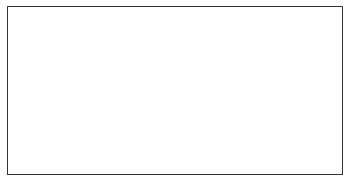

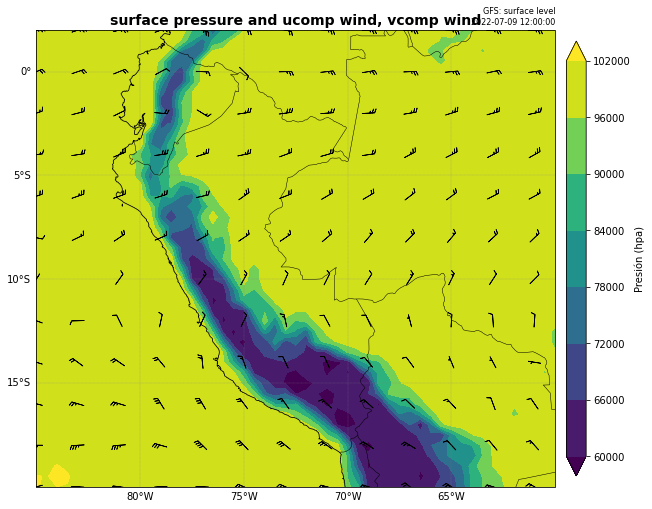

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
# Libraries
import pygrib
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
import numpy as np
# Consultando info
grib_file=gfs.file
grib = pygrib.open(grib_file)
#plot
extent = [-85, -20, -60, 2]


#seleccion de variables
surf_press = grib.select(name='Surface pressure')[0]
ucomp = grib.select(name='U component of wind', typeOfLevel='isobaricInhPa', level=500)[0]
vcomp = grib.select(name='V component of wind', typeOfLevel='isobaricInhPa', level=500)[0]
# Consultando info
init = str(ucomp.analDate)
run = str(ucomp.hour).zfill(2)
ftime = str(ucomp.forecastTime)
valid = str(ucomp.validDate)
# Extrayendo valores
ucomp, lats, lons = ucomp.data(lat1=extent[1], lat2=extent[3],
                               lon1=extent[0]+360, lon2=extent[2]+360)

vcomp = vcomp.data(extent[1], extent[3],
                   extent[0]+360, extent[2]+360)[0]

surf_press = surf_press.data(lat1=extent[1], lat2=extent[3],
                   lon1=extent[0]+360, lon2=extent[2]+360)[0]
# Convirtiendo viento en nudos
ucomp = ucomp*1.94384
vcomp = vcomp*1.94384

# Definiendo intervalos
data_min = 550
data_max = 1050
interval = 5
levels = np.arange(data_min, data_max, interval)


# Personalización de paletas
colors = [    '#e01401', '#fe3201', '#ff6101',
              '#fea001', '#ffc03c', '#fee978', '#fefbaa',
              '#0fa10e', '#36d23d', '#78f472', '#b4faaa', '#e6fee0',
              '#1465d3', '#1f6eea', '#3c96f5', '#79b8fa', '#b5f1fa']
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over("w")
cmap.set_under("#a40100")

ax = plt.axes(projection=ccrs.PlateCarree())
# Preparando figura

plt.figure(figsize=(10,10))
#gfs.barb(ucomp.vcomp) #alpha para hacerlo mas transparente
# gfs.figure()
# gfs.shaded(pressure,cmap)

ax = plt.axes(projection=ccrs.PlateCarree())

img_extent = [extent[0], extent[2], extent[1], extent[3]]
#relleno
ax.coastlines(resolution='10m', color='k', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='k', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', linestyle='--',
                  linewidth=0.25, xlocs=np.arange(-180,180,5),
                  ylocs=np.arange(-90,90,5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
img = ax.contourf(lons, lats, surf_press, extend="both")
# Create a flag to determine which barbs are flipped
skip = 4
flip_flag = np.zeros((ucomp.shape[0],vcomp.shape[1]))
#shaded
flip_flag[lats < 0] = 1
#barbas
ax.barbs(lons[::skip,::skip], lats[::skip,::skip],
                    ucomp[::skip,::skip], vcomp[::skip,::skip],
                    length = 5.0, sizes = dict(emptybarb=0.0, spacing=0.2, height=0.3),
                    linewidth=0.8, pivot='middle', barbcolor='k', alpha=1,
                    flip_barb = flip_flag[::skip,::skip])

plt.colorbar(img, label='Presión (hpa)', orientation='vertical', fraction=0.05, pad=0.02, shrink=0.80)


# plt.title(' , fontweight='bold', fontsize=14, loc='center')

plt.title('surface pressure and ucomp wind, vcomp wind' , fontweight='bold', fontsize=14, loc='center')
plt.title('GFS: surface level\n' + valid, fontsize=8, loc='right')

In [ ]:
# Consultando info
init = str(ucomp.analDate)
run = str(ucomp.hour).zfill(2)
ftime = str(ucomp.forecastTime)
valid = str(ucomp.validDate)


In [ ]:
pressure = grib.select(name='Pressure')[0]
ucomp = grib.select(name='U component of wind')[0]
vcomp = grib.select(name='V component of wind')[0]
#variable = self.grib.select(name=varname)[0]

In [ ]:
pressure

316:Pressure:Pa (instant):regular_ll:potentialVorticity:level 5e-07 K m2 kg-1 s-1:fcst time 0 hrs:from 202207091200

In [ ]:
ucomp 

4:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 202207091200

In [ ]:
vcomp

5:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 202207091200

In [ ]:
gfs.dataPath = f'Data/{gfs.run}/{gfs.date}/'
gfs.dataPath

In [ ]:
grib.select(name="")[0]

## descarga de MODIS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyhdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 703 kB 4.5 MB/s 


In [3]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 4.8 MB/s 
     |████████████████████████████████| 30.5 MB 80.3 MB/s 
     |████████████████████████████████| 6.3 MB 49.9 MB/s 
     |████████████████████████████████| 219 kB 68.6 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=5c4b8038f3636965eaffe687beaa3fccb8f15d4c7d589fcd6dcc2d0821f9519c
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [4]:
# !pip install gdal 
import gdal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyhdf import SD
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#MOD05
filename = "/content/drive/MyDrive/CICLOS UNALM - M. Peralta/2022 - I/tecnicas de programación/MOD05_L2.A2022189.1705.061.2022190020211.hdf"

In [6]:
hdf = SD.SD(filename)

In [ ]:
#MOD03
filename2="/content/drive/MyDrive/CICLOS UNALM - M. Peralta/2022 - I/tecnicas de programación/data clase 05 07/drive-download-20220705T204632Z-001/MOD03.A2019002.1515.061.2019002204200.hdf"

In [7]:
hdf

In [ ]:
hdf2 = SD.SD(filename2)

In [8]:
print(hdf)

In [ ]:
print(hdf2)

In [9]:
#DICCIONARIO DEL MOD05
dataset_dic1 = hdf.datasets()
dataset_dic1

{'Cloud_Mask_QA': (('Cell_Along_Swath_1km:mod05',
   'Cell_Across_Swath_1km:mod05'),
  (2030, 1354),
  20,
  7),
 'Latitude': (('Cell_Along_Swath_5km:mod05', 'Cell_Across_Swath_5km:mod05'),
  (406, 270),
  5,
  0),
 'Longitude': (('Cell_Along_Swath_5km:mod05', 'Cell_Across_Swath_5km:mod05'),
  (406, 270),
  5,
  1),
 'Quality_Assurance_Infrared': (('Cell_Along_Swath_5km:mod05',
   'Cell_Across_Swath_5km:mod05',
   'QA_Bytes_IR:mod05'),
  (406, 270, 5),
  20,
  12),
 'Quality_Assurance_Near_Infrared': (('Cell_Along_Swath_1km:mod05',
   'Cell_Across_Swath_1km:mod05',
   'QA_Bytes_NIR:mod05'),
  (2030, 1354, 1),
  20,
  11),
 'Scan_Start_Time': (('Cell_Along_Swath_5km:mod05',
   'Cell_Across_Swath_5km:mod05'),
  (406, 270),
  6,
  2),
 'Sensor_Azimuth': (('Cell_Along_Swath_5km:mod05',
   'Cell_Across_Swath_5km:mod05'),
  (406, 270),
  22,
  6),
 'Sensor_Zenith': (('Cell_Along_Swath_5km:mod05',
   'Cell_Across_Swath_5km:mod05'),
  (406, 270),
  22,
  5),
 'Solar_Azimuth': (('Cell_Along_Swa

In [ ]:
#notamos que el vapor near infrared tiene una matriz 2040 y 1354 y tiene los datos cada 1 km
#o sopresama tambien notamos que la latitud del MOD03 matriz 2040 y 1354 y tiene los datos cada 1 km
#Diccionario del MOD03
dataset_dic2 = hdf2.datasets()
dataset_dic2

{'EV center time': (('nscans',), (204,), 6, 21),
 'EV frames': (('nscans',), (204,), 23, 15),
 'EV start time': (('nscans',), (204,), 6, 18),
 'Focal_length': (('numbands',), (37,), 6, 40),
 'Geo scan quality': (('nscans', 'numqual'), (204, 4), 20, 27),
 'Height': (('nscans*10:MODIS_Swath_Type_GEO', 'mframes:MODIS_Swath_Type_GEO'),
  (2040, 1354),
  22,
  5),
 'Height Offset': (('nscans*20:MODIS_Swath_Type_GEO',
   'mframes*2:MODIS_Swath_Type_GEO'),
  (4080, 2708),
  20,
  4),
 'L1 scan quality': (('nscans', 'numqual'), (204, 4), 24, 26),
 'Land/SeaMask': (('nscans*10:MODIS_Swath_Type_GEO',
   'mframes:MODIS_Swath_Type_GEO'),
  (2040, 1354),
  21,
  11),
 'Latitude': (('nscans*10:MODIS_Swath_Type_GEO',
   'mframes:MODIS_Swath_Type_GEO'),
  (2040, 1354),
  5,
  0),
 'Longitude': (('nscans*10:MODIS_Swath_Type_GEO',
   'mframes:MODIS_Swath_Type_GEO'),
  (2040, 1354),
  5,
  1),
 'Mirror side': (('nscans',), (204,), 23, 22),
 'Moon Vector': (('nscans', 'vecdim'), (204, 3), 5, 25),
 'Range'

In [ ]:
#para cver que variables tengo EN MOD05
for idx,n in enumerate(dataset_dic1.keys()): #enumerate para enumerar los datos
  print(idx,n)

0 Latitude
1 Longitude
2 Scan_Start_Time
3 Solar_Zenith
4 Solar_Azimuth
5 Sensor_Zenith
6 Sensor_Azimuth
7 Cloud_Mask_QA
8 Water_Vapor_Near_Infrared
9 Water_Vapor_Correction_Factors
10 Water_Vapor_Infrared
11 Quality_Assurance_Near_Infrared
12 Quality_Assurance_Infrared


In [ ]:
#para cver que variables tengo EN MOD05
#Como podemos apreciar no tenemos water nearinfrarred vapor 
for idx,n in enumerate(dataset_dic2.keys()): #enumerate para enumerar los datos
  print(idx,n)

0 Latitude
1 Longitude
2 Scan Offset
3 Track Offset
4 Height Offset
5 Height
6 SensorZenith
7 SensorAzimuth
8 Range
9 SolarZenith
10 SolarAzimuth
11 Land/SeaMask
12 WaterPresent
13 gflags
14 Scan number
15 EV frames
16 SD frames
17 SV frames
18 EV start time
19 SD start time
20 SV start time
21 EV center time
22 Mirror side
23 SD Sun zenith
24 SD Sun azimuth
25 Moon Vector
26 L1 scan quality
27 Geo scan quality
28 orb_pos
29 orb_vel
30 T_inst2ECR
31 attitude_angles
32 sun_ref
33 num_impulse
34 impulse_enc
35 impulse_time
36 Scan Type
37 thermal_correction
38 attitude_quality
39 ephemeris_quality
40 Focal_length
41 band_position
42 detector_space
43 detector_offsets
44 T_offset
45 num_samples


In [ ]:

#Selecciono la variable water_vapor_infrarred DEL MOD05
SDS_name="Water_Vapor_Near_Infrared"
SDS_name2=""
sds = hdf.select(SDS_name) 

##a) Descargar los archivos MOD03.A2019002.1515.061.2019002204200.hdf y 
MOD05_L2.A2019002.1515.061.2019009001903.hdf y leer los datos de coordenadas y 
contenido de vapor de agua en infrarrojo cercano (

In [ ]:
#definiendo data del Water_Vapor_Near_Infrared
data=sds.get() #(2040,1354)
print(data) #esta en datos de radiancias


[[2614 2452 2486 ...  504  658  706]
 [2432 2368 2311 ...  258  481  615]
 [2556 2440 2325 ...  209  420  618]
 ...
 [ 409  461  460 ... 1270 3332 5047]
 [ 461  479  474 ...  627 2283 5135]
 [ 472  504  498 ...  391 1079 5045]]


In [ ]:
#Leyendo la latitud y longitud del MOD03
latitude = hdf2.select("Latitude") 
lat= latitude[:] ##para seleccionar todo
longitude = hdf2.select("Longitude")
lon=longitude[:]##para seleccionar todo

In [ ]:
lat #MOD03 #(2040,1354)

array([[ -5.4343886,  -5.4418197,  -5.4491897, ...,  -8.472768 ,
         -8.477689 ,  -8.482626 ],
       [ -5.452334 ,  -5.4597096,  -5.4670243, ...,  -8.49066  ,
         -8.495621 ,  -8.5006   ],
       [ -5.4702773,  -5.477597 ,  -5.484857 , ...,  -8.508542 ,
         -8.513547 ,  -8.518568 ],
       ...,
       [-23.163645 , -23.173988 , -23.184237 , ..., -26.510466 ,
        -26.513779 , -26.517082 ],
       [-23.18141  , -23.1917   , -23.201895 , ..., -26.528584 ,
        -26.531952 , -26.53531  ],
       [-23.199173 , -23.209408 , -23.219551 , ..., -26.546711 ,
        -26.550123 , -26.553537 ]], dtype=float32)

In [ ]:
lon #MOD03 #(2040,1354)

array([[-82.57478 , -82.531876, -82.4893  , ..., -61.790535, -61.747498,
        -61.704277],
       [-82.57766 , -82.534744, -82.49216 , ..., -61.792557, -61.74967 ,
        -61.70657 ],
       [-82.58055 , -82.53762 , -82.495026, ..., -61.79467 , -61.751877,
        -61.708908],
       ...,
       [-87.6304  , -87.58409 , -87.53813 , ..., -64.72729 , -64.677864,
        -64.6283  ],
       [-87.63516 , -87.58883 , -87.542854, ..., -64.72832 , -64.678925,
        -64.6294  ],
       [-87.639946, -87.59359 , -87.54759 , ..., -64.72922 , -64.68003 ,
        -64.630554]], dtype=float32)

In [ ]:
attrs = sds.attributes()

In [ ]:
#atributos de Water Vapor - Near Infrared MO05
attrs = sds.attributes() #(2040,1354)
attrs

{'Cell_Across_Swath_Sampling': [1, 1354, 1],
 'Cell_Along_Swath_Sampling': [1, 2030, 1],
 'Geolocation_Pointer': 'Internal geolocation arrays',
 'Parameter_Type': 'Output',
 '_FillValue': -9999,
 'add_offset': 0.0,
 'long_name': 'Total Column Precipitable Water Vapor - Near Infrared Retrieval',
 'scale_factor': 0.0010000000474974513,
 'unit': 'cm',
 'valid_range': [0, 20000]}

factor de corrección para obtener las variables validas
MOD05  = scalefactor¨*(data - add_offset)

In [ ]:

scale_factor = attrs["scale_factor"]
scale_factor

0.0010000000474974513

In [ ]:
add_offset = attrs["add_offset"]
add_offset

0.0

In [ ]:
fillv= attrs["_FillValue"]
fillv

-9999

In [ ]:
MOD05 = scale_factor*(data - add_offset) #multiplicación de la matriz
MOD05

array([[2.61400012, 2.45200012, 2.48600012, ..., 0.50400002, 0.65800003,
        0.70600003],
       [2.43200012, 2.36800011, 2.31100011, ..., 0.25800001, 0.48100002,
        0.61500003],
       [2.55600012, 2.44000012, 2.32500011, ..., 0.20900001, 0.42000002,
        0.61800003],
       ...,
       [0.40900002, 0.46100002, 0.46000002, ..., 1.27000006, 3.33200016,
        5.04700024],
       [0.46100002, 0.47900002, 0.47400002, ..., 0.62700003, 2.28300011,
        5.13500024],
       [0.47200002, 0.50400002, 0.49800002, ..., 0.39100002, 1.07900005,
        5.04500024]])

In [ ]:
data = data.astype(float)
data[data==fillv] = np.NaN

In [ ]:
data

array([[2614., 2452., 2486., ...,  504.,  658.,  706.],
       [2432., 2368., 2311., ...,  258.,  481.,  615.],
       [2556., 2440., 2325., ...,  209.,  420.,  618.],
       ...,
       [ 409.,  461.,  460., ..., 1270., 3332., 5047.],
       [ 461.,  479.,  474., ...,  627., 2283., 5135.],
       [ 472.,  504.,  498., ...,  391., 1079., 5045.]])

In [ ]:
#leyendo la data del VAPOR INFRARROJO CERCANO APLICANDO EL FACTOR DE CORRECIÓN
MOD05 = scale_factor*(data-add_offset)
MOD05

array([[2.61400012, 2.45200012, 2.48600012, ..., 0.50400002, 0.65800003,
        0.70600003],
       [2.43200012, 2.36800011, 2.31100011, ..., 0.25800001, 0.48100002,
        0.61500003],
       [2.55600012, 2.44000012, 2.32500011, ..., 0.20900001, 0.42000002,
        0.61800003],
       ...,
       [0.40900002, 0.46100002, 0.46000002, ..., 1.27000006, 3.33200016,
        5.04700024],
       [0.46100002, 0.47900002, 0.47400002, ..., 0.62700003, 2.28300011,
        5.13500024],
       [0.47200002, 0.50400002, 0.49800002, ..., 0.39100002, 1.07900005,
        5.04500024]])

##b) Obteniendo la cantidad de  Vapor de agua precipitable obtenido de la longitud del Infrarrojo cercano del MOD05

In [ ]:
##como hallo el obs
lat_obs= -15 # representa -12S°
long_obs= -75 #77 
#SOLO con Del las coordenadas del MOD03 que son datos de 1km a 1km se puede plotear
# pero con los datos del MOD05 

In [ ]:
#ESQ ACA TENEMOS Q HACERLO CON LA LATITUDE Y LONGITUDE DE MOD03 o con la MOD05 
#CREO Q
coordinates= np.unravel_index((np.abs(lat-lat_obs)+np.abs(lon-long_obs)).argmin(),lat.shape)

In [ ]:


coordinates

(902, 560)

In [ ]:
MOD05[coordinates] 

0.8010000380454585

In [ ]:

print('El VAP en las coordenadas',lat_obs,'° y',long_obs,'° es: ',round(MOD05[coordinates],2)*10,'mm')


El VAP en las coordenadas -15 ° y -75 ° es:  8.0 mm


In [ ]:
lat

array([[ -5.4343886,  -5.4418197,  -5.4491897, ...,  -8.472768 ,
         -8.477689 ,  -8.482626 ],
       [ -5.452334 ,  -5.4597096,  -5.4670243, ...,  -8.49066  ,
         -8.495621 ,  -8.5006   ],
       [ -5.4702773,  -5.477597 ,  -5.484857 , ...,  -8.508542 ,
         -8.513547 ,  -8.518568 ],
       ...,
       [-23.163645 , -23.173988 , -23.184237 , ..., -26.510466 ,
        -26.513779 , -26.517082 ],
       [-23.18141  , -23.1917   , -23.201895 , ..., -26.528584 ,
        -26.531952 , -26.53531  ],
       [-23.199173 , -23.209408 , -23.219551 , ..., -26.546711 ,
        -26.550123 , -26.553537 ]], dtype=float32)

##c) Plotear los datos para la región del archivo, mostrando territorios y frontera, con su 
respectivo colorbar

In [ ]:
min_lat

-26.553537

In [ ]:
max_lat

-5.4343886

In [ ]:
min_lon

-87.639946

In [ ]:
max_lon

-61.704277

In [ ]:
print(lat_MOD05.min())

-26.497036


In [ ]:
print(lat_MOD05.max())

-5.484857


In [ ]:
print(lon_MOD05.max())

-61.962666


In [ ]:
print(lon_MOD05.min())

-87.53813


In [ ]:
min_lat = lat.min()
max_lat = lat.max()
min_lon = lon.min()
max_lon = lon.max()

In [ ]:
from mpl_toolkits.basemap import Basemap, cm
from mpl_toolkits.basemap import Basemap, cm



In [ ]:
!pip install pygrib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


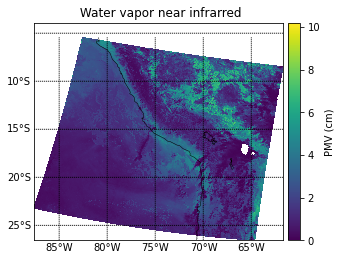

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pygrib
#import cartopy 
#import matplotlib.pyplot as plt
#import cartopy, cartopy.crs as ccrs
#import numpy as np
m = Basemap(projection='cyl', resolution='l', llcrnrlat=min_lat, urcrnrlat = max_lat, llcrnrlon=min_lon, urcrnrlon = max_lon)
m.drawcoastlines(linewidth=0.5) # para dibujar lineas
m.drawparallels(np.arange(-90.,120.,5.),labels=[1,0,0,0]) #para crear paralelos
m.drawmeridians(np.arange(-180.,181.,5.),labels=[0,0,0,1]) #para crear meridianos
#x = plt.axes(projection="cyl")
#m.coastlines(resolution='10m', color='k', linewidth=0.8)
#m.add_feature(cartopy.feature.BORDERS, edgecolor='k', linewidth=0.5)
#ax = plt.axes(projection=ccrs.PlateCarree())
#m.add_feature(cartopy.feature.BORDERS, edgecolor='k', linewidth=0.5)

x,y = (lon,lat)
m.pcolormesh(x,y,MOD05)
cb = m.colorbar()
plt.autoscale()

cb.set_label("PMV (cm)")
plt.title(" Water vapor near infrarred", fontsize=12)
plt.show()